In [1]:
from Python.tigre.utilities.io.VarianDataLoader import read_scatter_calib,get_xmlns,load_blank_projections,read_varian_geometry, VarianDataLoader,enforce_positive,load_projections
from Python.tigre.algorithms.single_pass_algorithms import FDK
from Python.tigre import plotimg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydir = "C:/CBCT_Scatter_Removal_Project/data/clinical/4100758/2021-07-06_101037/11528a87-b894-4239-846d-45d8fd1efeda"

In [15]:
log_projs,geo,angles = VarianDataLoader(filepath=mydir,acdc=1,dps=1,sc=0)

Loading Varian CBCT dataset: C:/CBCT_Scatter_Removal_Project/data/clinical/4100758/2021-07-06_101037/11528a87-b894-4239-846d-45d8fd1efeda\Acquisitions


100%|██████████| 900/900 [02:51<00:00,  5.26it/s]


Performing detector point scatter correction: 


0it [00:00, ?it/s]


ValueError: There are 1024 points and 768 values in dimension 0

In [4]:
print(geo)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1500.0 mm
Distance from source to origin (DSO)= 1000.0 mm
-----
Detector parameters
Number of pixels (nDetector) = [ 768 1024]
Size of each pixel (dDetector) = [0.388 0.388] mm
Total size of the detector (sDetector) = [297.984 397.312] mm
-----
Image parameters
Number of voxels (nVoxel) = [ 88. 512. 512.]
Total size of the image (sVoxel) = [174.98713205 464.90642318 464.90642318] mm
Size of each voxel (dVoxel) = [1.98849014 0.90802036 0.90802036] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [   0. -160.] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5


In [8]:
geo.offDetector = - geo.offDetector

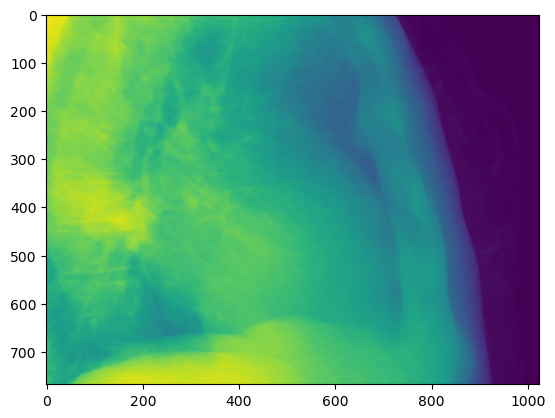

In [9]:
plt.figure()
plt.imshow(log_projs[0])
plt.show()

In [10]:
recon = FDK(log_projs,geo,angles)
recon = enforce_positive(recon)

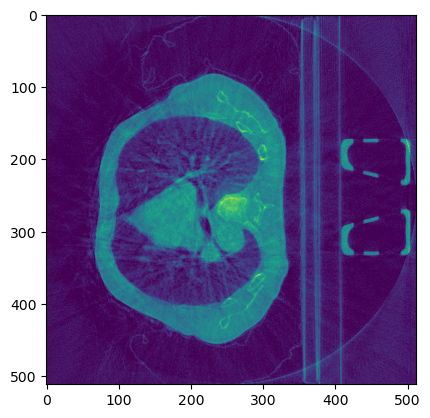

In [14]:
plt.figure()
plt.imshow(recon[20])
plt.show()

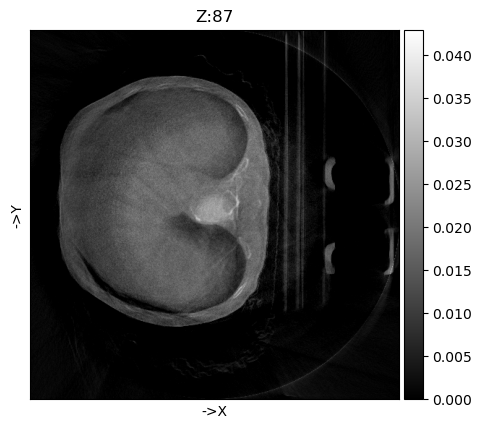

In [12]:
plotimg(recon, dim="Z",savegif='recon.gif')

In [ ]:
geometry, scan_params = read_varian_geometry(mydir)
sc_calib = read_scatter_calib(mydir)
blank_projs,blank_angles,blank_airnorms = load_blank_projections(mydir,scan_params)
projs, angles, airnorms = load_projections(mydir)